In [1]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
import numpy.ma.mrecords as mrecords

In [2]:
# Import & visualize dataset
dataset = pd.read_csv("Stars.csv")
dataset.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
dataset.isnull().any()

Temperature       False
L                 False
R                 False
A_M               False
Color             False
Spectral_Class    False
Type              False
dtype: bool

In [4]:
dataset.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


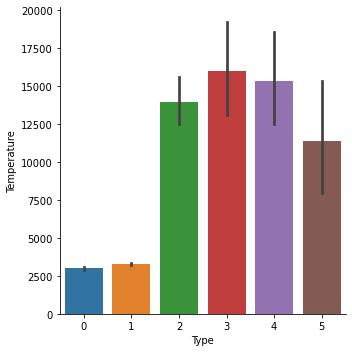

In [5]:
# Visualisations exploratoire 
sns.catplot(x="Type", y="Temperature", data = dataset, kind="bar")

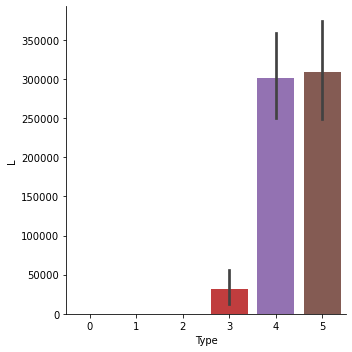

In [6]:
# Visualisations exploratoire 
sns.catplot(x="Type", y="L", data = dataset, kind="bar")

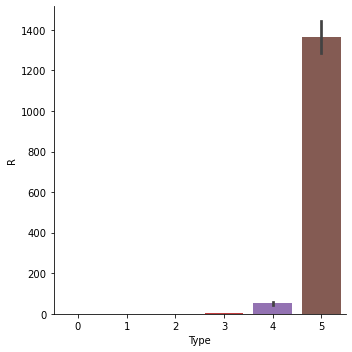

In [7]:
# Visualisations exploratoire 
sns.catplot(x="Type", y="R", data = dataset, kind="bar")

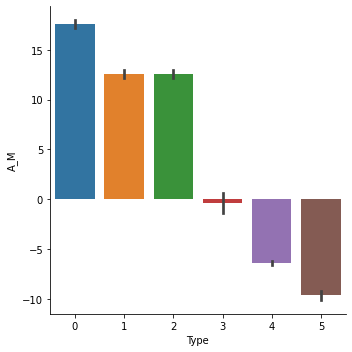

In [8]:
# Visualisations exploratoire 
#Effectuer la visulation de l'ompact des couleurs et de la classe spectrale aprés encodage
#Verifier les visualisations des parametres avant et aprés standardisation
sns.catplot(x="Type", y="A_M", data = dataset, kind="bar")

In [9]:
# Dummyfication 
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()
#dataset.columns

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Séparation de X & y 
X = dataset.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = dataset.iloc[:, 4]

In [11]:
X.head(3)

,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.0024,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.0005,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.0003,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
y.head(3)

0    0
1    0
2    0
Name: Type, dtype: int64

In [13]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [15]:
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [16]:
# Application du modèle 1

#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)

In [17]:
# Predictions on training set
#print("Predictions on train set...")
#y_train_pred = classifier.predict(X_train)
#print("...Done.")
#print()

#print("#### First five predictions on TRAIN set ####")
#print(y_train_pred[0:5])

In [18]:

### Assessment of performances ###
#print("--- Assessment of performances ---")

# Plot confusion matrix
#cm = plot_confusion_matrix(classifier, X_train, y_train)
#cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
#plt.show() # Show graph
#print("accuracy-score on train set : ", classifier.score(X_train, y_train))


#cm = plot_confusion_matrix(classifier, X_test, y_test)
#cm.ax_.set_title("Confusion matrix on test set ")
#plt.show() # Show graph
#print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [19]:
# Overfitting


In [20]:
dataset.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Type', 'Color_Blue White',
       'Color_Blue white', 'Color_Blue-White', 'Color_Blue-white',
       'Color_Orange', 'Color_Orange-Red', 'Color_Pale yellow orange',
       'Color_Red', 'Color_White', 'Color_White-Yellow', 'Color_Whitish',
       'Color_Yellowish', 'Color_Yellowish White', 'Color_white',
       'Color_yellow-white', 'Color_yellowish', 'Spectral_Class_B',
       'Spectral_Class_F', 'Spectral_Class_G', 'Spectral_Class_K',
       'Spectral_Class_M', 'Spectral_Class_O'],
      dtype='object')

In [21]:
dataset.rename(columns={'Color_Blue White' : 'CBW', 'Color_Blue white' : 'CBw', 'Color_Blue-White' : 'CB-W', 'Color_Blue-white' : 'CB-w',
       'Color_Orange' : 'CO', 'Color_Orange-Red' : 'COR', 'Color_Pale yellow orange' : 'CPyo',
       'Color_Red' : 'CR', 'Color_White': 'CW', 'Color_White-Yellow' : 'CWY', 'Color_Whitish' : 'Cwhitish',
       'Color_Yellowish' : 'CYellowish', 'Color_Yellowish White' : 'CYellowish-W', 'Color_white' : 'Cw',
       'Color_yellow-white' : 'Cyw', 'Color_yellowish' : 'Cyellowish', 'Spectral_Class_B' : 'Spectrclass_B',
       'Spectral_Class_F' : 'Spectrclass_F', 'Spectral_Class_G' : 'Spectrclass_G', 'Spectral_Class_K' : 'Spectrclass_K',
       'Spectral_Class_M' : 'Spectrclass_M', 'Spectral_Class_O' : 'Spectrclass_O'}, inplace=True)



In [22]:
dataset.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Type', 'CBW', 'CBw', 'CB-W', 'CB-w',
       'CO', 'COR', 'CPyo', 'CR', 'CW', 'CWY', 'Cwhitish', 'CYellowish',
       'CYellowish-W', 'Cw', 'Cyw', 'Cyellowish', 'Spectrclass_B',
       'Spectrclass_F', 'Spectrclass_G', 'Spectrclass_K', 'Spectrclass_M',
       'Spectrclass_O'],
      dtype='object')

In [23]:
# Feature Importance
#pd.DataFrame({"Features": ["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], 
           #  "Values": classifier.coef_.squeeze()})


In [24]:
# Set coefficient to absolute values to rank features
#feature_importance["Values"] = feature_importance["Values"].abs()

# Visualize ranked features using seaborn
#sns.catplot(x="Features", 
           # y="Values", 
           # data=feature_importance.sort_values(by="Values", ascending=False), 
           # kind="bar",
           # aspect=16/9) # Resize graph

In [25]:
# Decision Tree
# Training model
print("Training model...")
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
print("...Done.")


Training model...
...Done.


In [26]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_DT.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [27]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier_DT.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


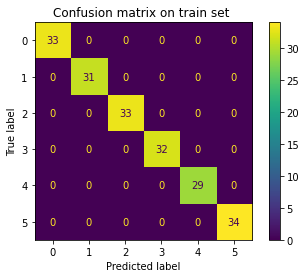

accuracy-score on train set :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


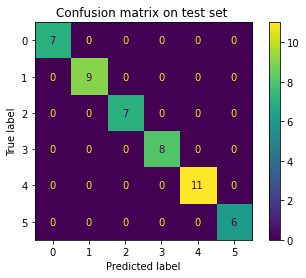

accuracy-score on test set :  1.0


In [28]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_DT = plot_confusion_matrix(classifier_DT, X_train, y_train)
cm_DT.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_DT.score(X_train, y_train))


cm_DT = plot_confusion_matrix(classifier_DT, X_test, y_test)
cm_DT.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_DT.score(X_test, y_test))

In [98]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_DT = pd.DataFrame({"Features": ["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], 
                                      "Values": classifier_DT.feature_importances_})
feature_importance_DT.sort_values(["Values"], ascending=False)


,Features,Values
3,A_M,0.602884
2,R,0.204163
1,L,0.192953
0,Temperature,0.000000
15,CYellowish,0.000000
24,Spectrclass_M,0.000000
23,Spectrclass_K,0.000000
22,Spectrclass_G,0.000000
21,Spectrclass_F,0.000000
20,Spectrclass_B,0.000000


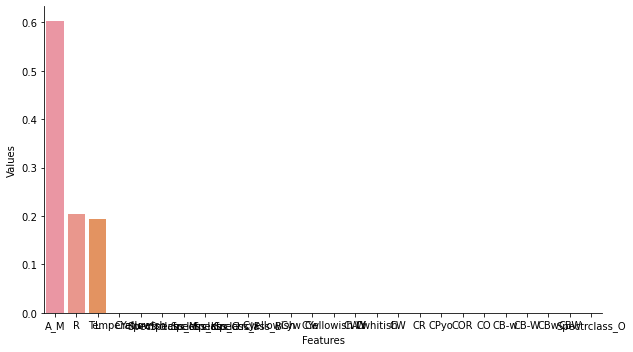

In [99]:


# Set coefficient to absolute values to rank features
feature_importance_DT["Values"] = feature_importance_DT["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_DT.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

Train model...
...Done.
Train score:  0.828125
Test score:  0.8541666666666666
--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


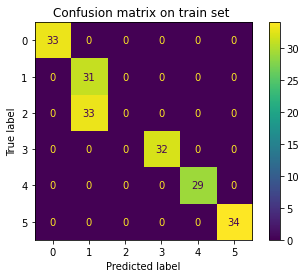

accuracy-score on train set :  0.828125


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


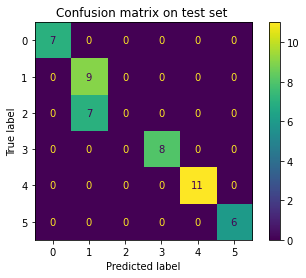

accuracy-score on test set :  0.8541666666666666


In [104]:
#Our model is overfitting. Let's try to play with parameters min_samples=80
# Train model
print("Train model...")
classifier_DT1 = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier_DT1.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier_DT1.score(X_train, y_train))
print("Test score: ", classifier_DT1.score(X_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_DT1 = plot_confusion_matrix(classifier_DT1, X_train, y_train)
cm_DT1.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_DT1.score(X_train, y_train))


cm_DT1 = plot_confusion_matrix(classifier_DT1, X_test, y_test)
cm_DT1.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_DT1.score(X_test, y_test))

In [106]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_DT1 = pd.DataFrame({"Features": ["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], 
                                      "Values": classifier_DT1.feature_importances_})
feature_importance_DT1.sort_values(["Values"], ascending=False)


,Features,Values
3,A_M,0.75
2,R,0.25
0,Temperature,0.00
14,Cwhitish,0.00
24,Spectrclass_M,0.00
23,Spectrclass_K,0.00
22,Spectrclass_G,0.00
21,Spectrclass_F,0.00
20,Spectrclass_B,0.00
19,Cyellowish,0.00


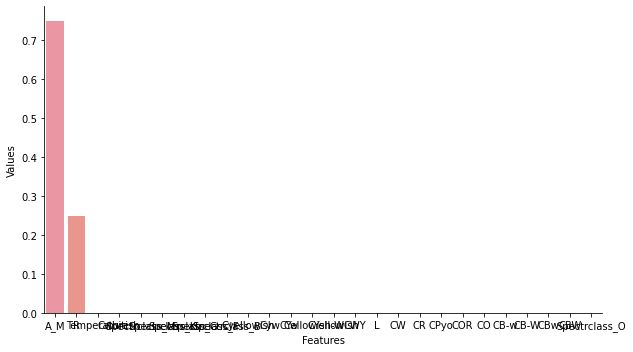

In [107]:
# Set coefficient to absolute values to rank features
feature_importance_DT1["Values"] = feature_importance_DT1["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_DT1.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

In [108]:
#Random Forest nestimators = 30
# Training model
print("Training model...")
classifier_RF = RandomForestClassifier(n_estimators = 30)
classifier_RF.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [109]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_RF.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [110]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_RF.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


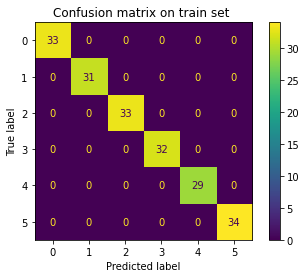

accuracy-score on train set :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


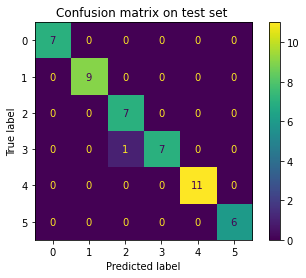

accuracy-score on test set :  0.9791666666666666


In [111]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_RF = plot_confusion_matrix(classifier_RF, X_train, y_train)
cm_RF.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_RF.score(X_train, y_train))


cm_RF = plot_confusion_matrix(classifier_RF, X_test, y_test)
cm_RF.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_RF.score(X_test, y_test))

In [112]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_RF = pd.DataFrame({"Features": ["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], 
                                      "Values": classifier_RF.feature_importances_})
feature_importance_RF.sort_values(["Values"], ascending=False)

,Features,Values
2,R,0.317168
3,A_M,0.257749
1,L,0.155094
0,Temperature,0.100272
11,CR,0.064908
24,Spectrclass_M,0.038730
25,Spectrclass_O,0.020641
7,CB-w,0.014388
20,Spectrclass_B,0.010151
21,Spectrclass_F,0.005251


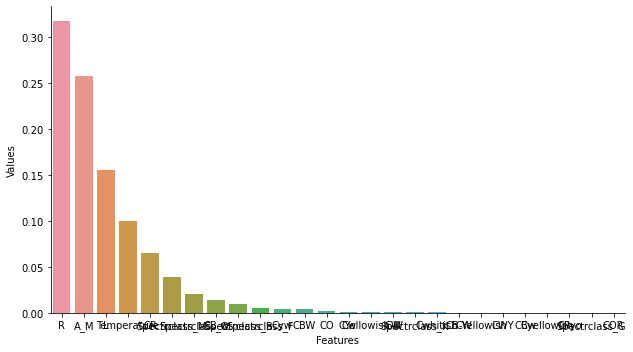

In [113]:
# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_RF.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

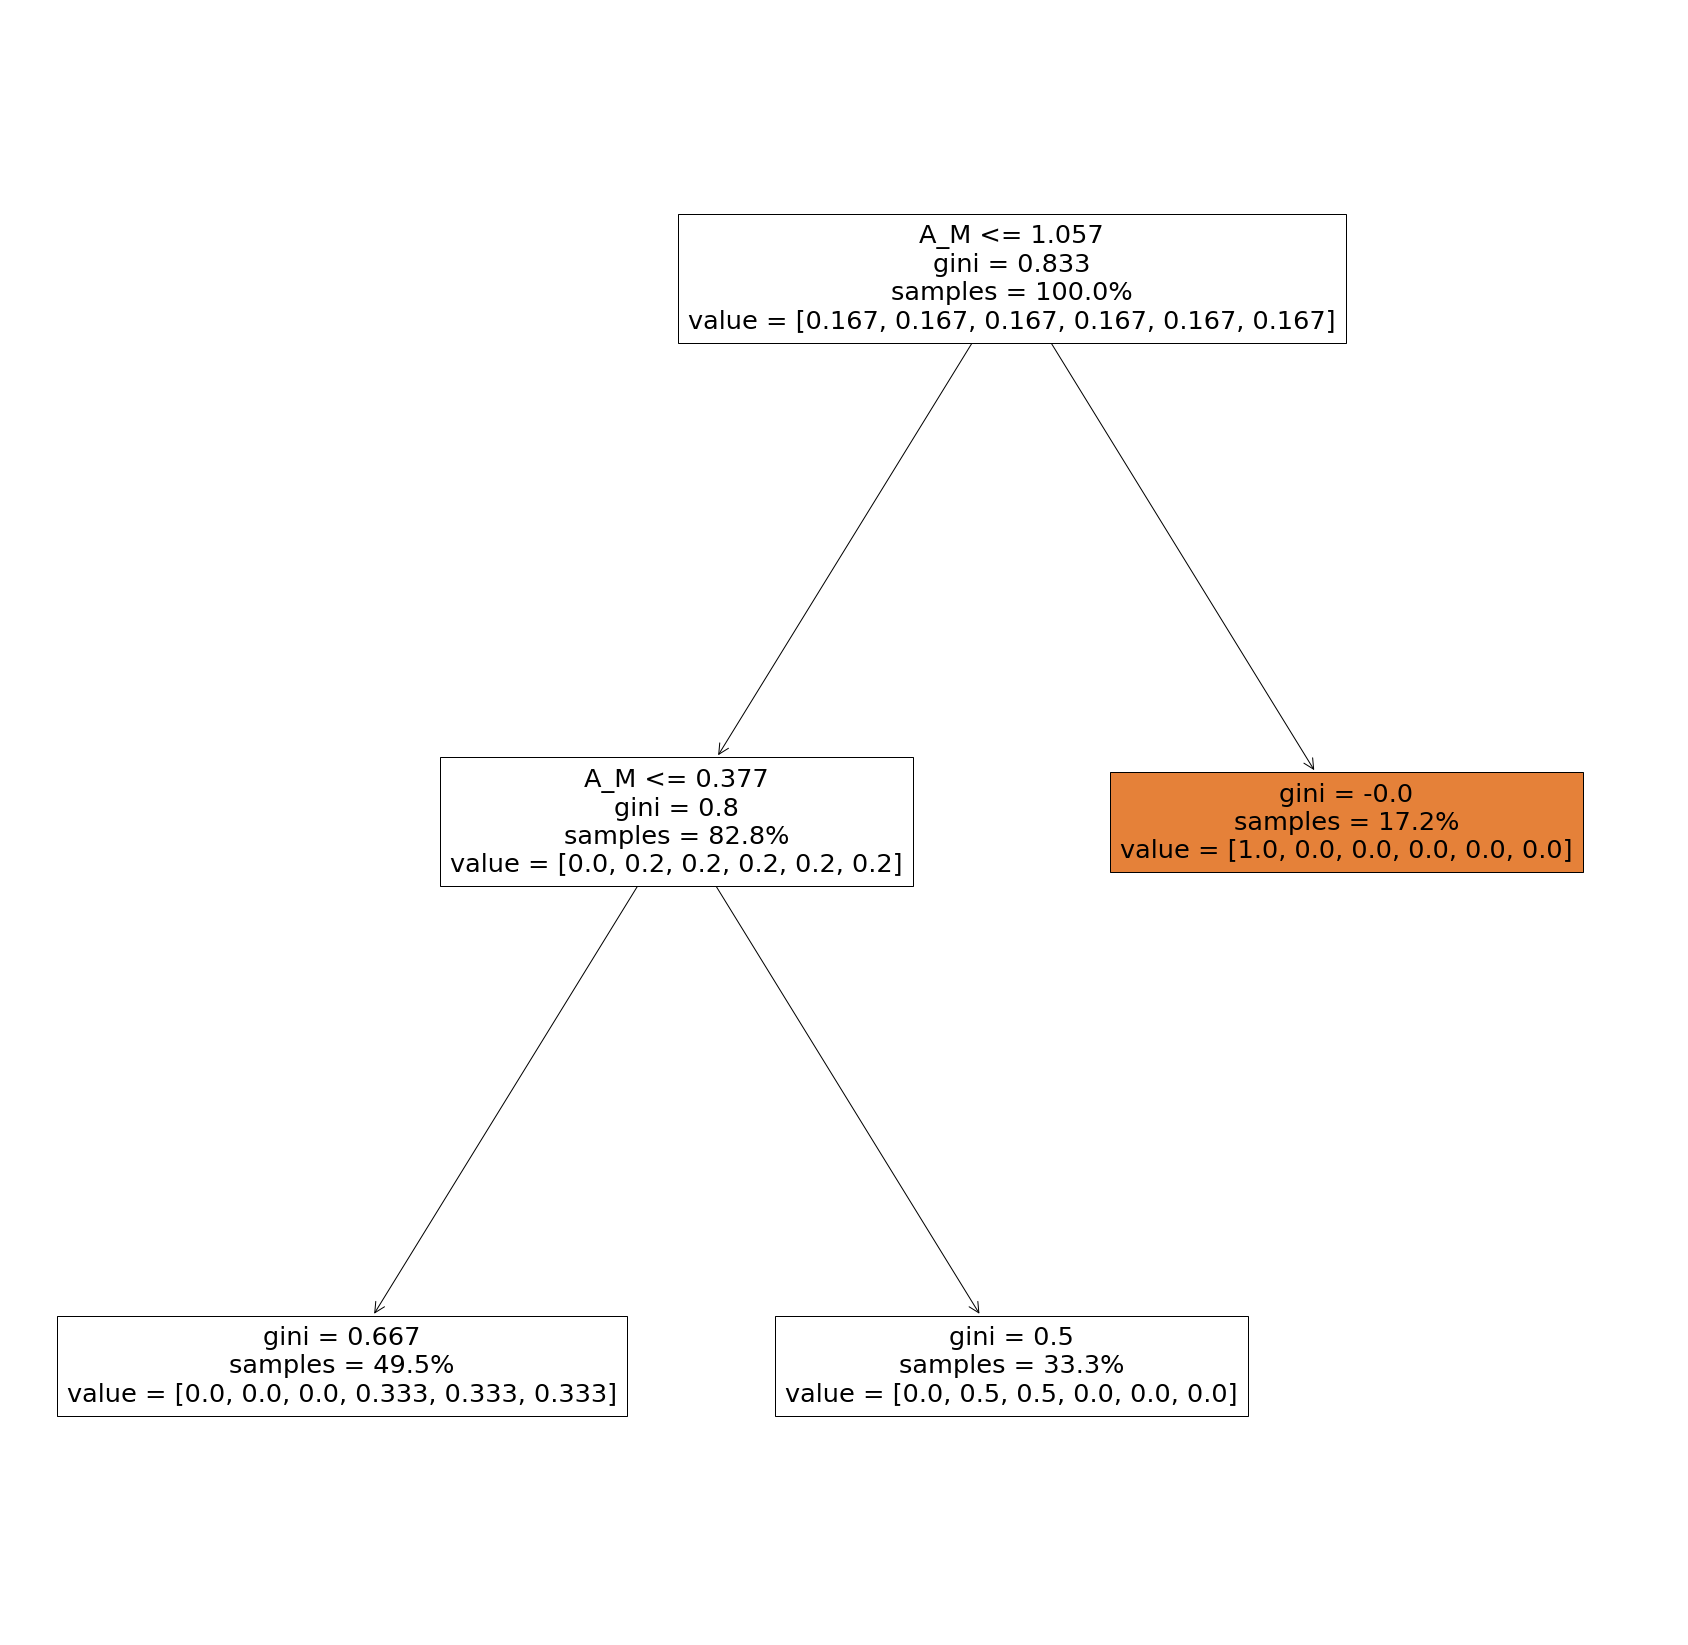

In [115]:
from sklearn.tree import plot_tree

classifier_RF = DecisionTreeClassifier(min_samples_split=100, class_weight="balanced")
classifier_RF.fit(X_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier_RF, filled=True, feature_names=["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], proportion=True,ax=ax)
plt.show()

In [158]:
#Random Forest nestimators = 10
# Training model
print("Training model...")
classifier_RF1 = RandomForestClassifier(n_estimators = 10)
classifier_RF1.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [159]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_RF1.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [160]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_RF1.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


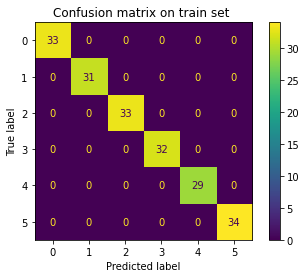

accuracy-score on train set :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


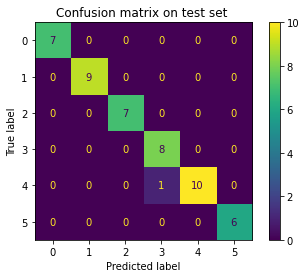

accuracy-score on test set :  0.9791666666666666


In [161]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_RF1 = plot_confusion_matrix(classifier_RF1, X_train, y_train)
cm_RF1.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_RF1.score(X_train, y_train))


cm_RF1 = plot_confusion_matrix(classifier_RF1, X_test, y_test)
cm_RF1.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_RF1.score(X_test, y_test))


In [162]:
# Plusieurs valeurs testées pour le n_estimators (10, 40, 80, 100, 1000) et le résultat est toujours le meme overfitting avec des scores test et train = 1.

In [163]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_RF1 = pd.DataFrame({"Features": ["Temperature", "L", "R", "A_M", "CBW", "CBw", "CB-W", "CB-w", "CO", "COR", "CPyo", "CR", "CW", "CWY", "Cwhitish", "CYellowish", "CYellowish-W", "Cw", "Cyw", "Cyellowish", "Spectrclass_B", "Spectrclass_F", "Spectrclass_G", "Spectrclass_K", "Spectrclass_M", "Spectrclass_O"], 
                                      "Values": classifier_RF1.feature_importances_})
feature_importance_RF1.sort_values(["Values"], ascending=False)

,Features,Values
3,A_M,0.290183
2,R,0.236011
1,L,0.174392
0,Temperature,0.095042
24,Spectrclass_M,0.049600
11,CR,0.048992
25,Spectrclass_O,0.037635
7,CB-w,0.033525
20,Spectrclass_B,0.008820
18,Cyw,0.008011


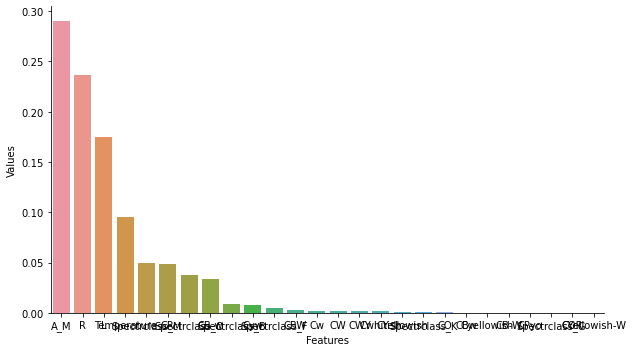

In [164]:
# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_RF1.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph